In [1]:
import torch
from torch import optim, nn
from torchvision import models, transforms
model = models.vgg16(pretrained=True)

In [2]:
class FeatureExtractor(nn.Module):
    def __init__(self, model):
        super(FeatureExtractor, self).__init__()
            # Extract VGG-16 Feature Layers
        self.features = list(model.features)
        self.features = nn.Sequential(*self.features)
            # Extract VGG-16 Average Pooling Layer
        self.pooling = model.avgpool
            # Convert the image into one-dimensional vector
        self.flatten = nn.Flatten()
            # Extract the first part of fully-connected layer from VGG16
        self.fc = model.classifier[0]
  
    def forward(self, x):
        # It will take the input 'x' until it returns the feature vector called 'out'
        out = self.features(x)
        out = self.pooling(out)
        out = self.flatten(out)
        out = self.fc(out) 
        return out 

In [3]:
model = models.vgg16(pretrained=True)
new_model = FeatureExtractor(model)

# Change the device to GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else "cpu")
new_model = new_model.to(device)

In [4]:
new_model

FeatureExtractor(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=

In [5]:
!pip install aicrowd-cli
API_KEY = '8dc53a4045f7b0805fda17d33788bae1'
!aicrowd login --api-key $API_KEY
!aicrowd dataset download --challenge mars-rotation
!unzip test.zip -d data

API Key valid
Saved API Key successfully!
^C

Aborted!
unzip:  cannot find or open test.zip, test.zip.zip or test.zip.ZIP.


In [6]:
from tqdm import tqdm
import numpy as np


# Transform the image, so it becomes readable with the model
transform = transforms.Compose([
  transforms.ToPILImage(),
  transforms.CenterCrop(512),
  transforms.Resize(448),
  transforms.ToTensor()                              
])

In [7]:
# Will contain the feature
features = []

In [8]:
import cv2

In [9]:
img_path = "Vehicle_Tracking_Module/cropped"

In [10]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(img_path) if isfile(join(img_path, f))]

In [11]:
for file in tqdm(onlyfiles):
    img = cv2.imread(img_path + '/' + file)
    try:
        img = transform(img)
        # Reshape the image. PyTorch model reads 4-dimensional tensor
        # [batch_size, channels, width, height]
        img = img.reshape(1, 3, 448, 448)
        img = img.to(device)
        with torch.no_grad():
        # Extract the feature from the image
            feature = new_model(img)
        # Convert to NumPy Array, Reshape it, and save it to features variable
        features.append(feature.cpu().detach().numpy().reshape(-1))
    except:
        pass
# Convert to NumPy Array
features = np.array(features)

100%|██████████| 172/172 [00:59<00:00,  2.87it/s]


In [13]:
features.shape

(172, 4096)

In [33]:
from sklearn.cluster import KMeans

# Initialize the model
model = KMeans(n_clusters=3, random_state=42)

# Fit the data into the model
model.fit(features)

# Extract the labels
labels = model.labels_

print(labels)

[2 2 0 0 0 0 0 2 2 0 1 0 0 0 2 1 2 1 2 0 1 2 0 0 2 0 2 0 0 0 2 1 2 1 0 2 2
 2 0 0 2 0 0 2 2 0 0 0 1 2 1 0 2 1 2 0 1 2 0 1 2 0 0 1 0 2 2 0 0 0 2 2 0 1
 2 0 2 2 0 0 2 2 2 1 2 0 0 0 0 2 0 0 0 0 0 0 2 1 0 0 2 1 0 1 1 2 2 1 0 0 2
 1 2 0 0 0 1 1 0 1 0 0 1 2 0 2 0 0 1 1 2 2 2 0 1 0 0 0 2 2 2 2 1 2 2 2 0 2
 0 2 2 2 2 1 0 0 2 1 2 1 0 2 1 0 0 0 0 2 0 2 1 1]


In [34]:
import glob
from IPython.display import Image, display

clusters = {0:[], 1:[],2:[],3:[],4:[]}

In [35]:
for i in range(0, len(labels)):
    if labels[i] == 0:
        clusters[0].append(i)
    if labels[i] == 1:
        clusters[1].append(i)
    if labels[i] == 2:
        clusters[2].append(i)
    if labels[i] == 3:
        clusters[3].append(i)
    if labels[i] == 4:
        clusters[4].append(i)

In [36]:
clusters

{0: [2,
  3,
  4,
  5,
  6,
  9,
  11,
  12,
  13,
  19,
  22,
  23,
  25,
  27,
  28,
  29,
  34,
  38,
  39,
  41,
  42,
  45,
  46,
  47,
  51,
  55,
  58,
  61,
  62,
  64,
  67,
  68,
  69,
  72,
  75,
  78,
  79,
  85,
  86,
  87,
  88,
  90,
  91,
  92,
  93,
  94,
  95,
  98,
  99,
  102,
  108,
  109,
  113,
  114,
  115,
  118,
  120,
  121,
  124,
  126,
  127,
  133,
  135,
  136,
  137,
  146,
  148,
  154,
  155,
  160,
  163,
  164,
  165,
  166,
  168],
 1: [10,
  15,
  17,
  20,
  31,
  33,
  48,
  50,
  53,
  56,
  59,
  63,
  73,
  83,
  97,
  101,
  103,
  104,
  107,
  111,
  116,
  117,
  119,
  122,
  128,
  129,
  134,
  142,
  153,
  157,
  159,
  162,
  170,
  171],
 2: [0,
  1,
  7,
  8,
  14,
  16,
  18,
  21,
  24,
  26,
  30,
  32,
  35,
  36,
  37,
  40,
  43,
  44,
  49,
  52,
  54,
  57,
  60,
  65,
  66,
  70,
  71,
  74,
  76,
  77,
  80,
  81,
  82,
  84,
  89,
  96,
  100,
  105,
  106,
  110,
  112,
  123,
  125,
  130,
  131,
  132,
  138,
  139,


0


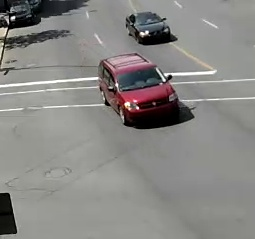

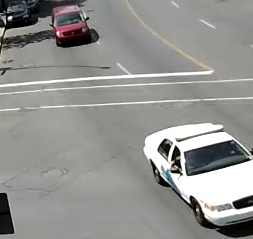

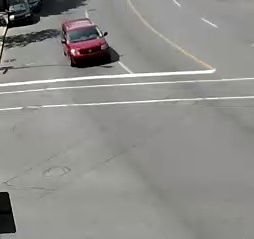

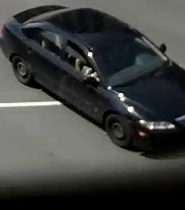

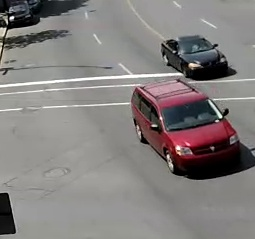

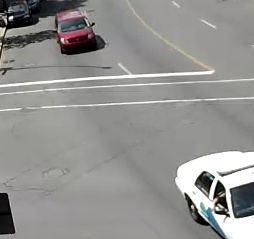

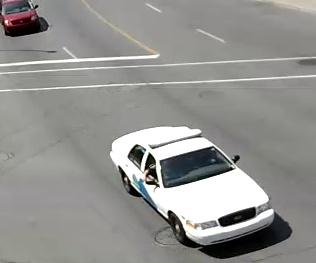

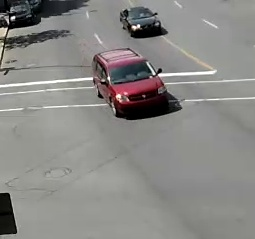

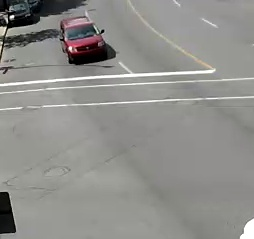

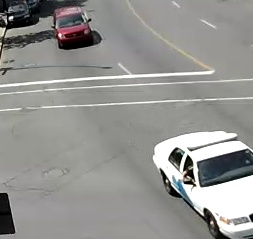

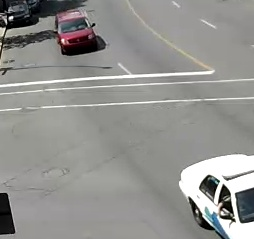

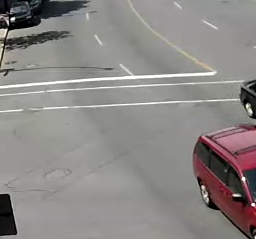

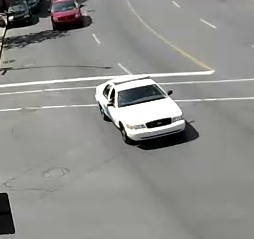

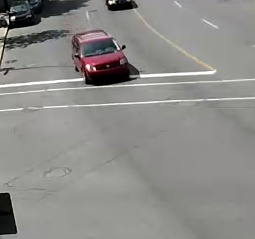

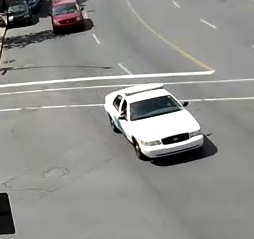

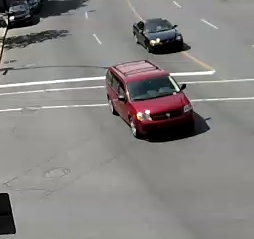

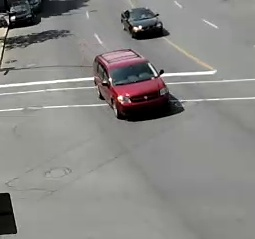

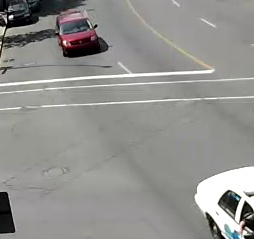

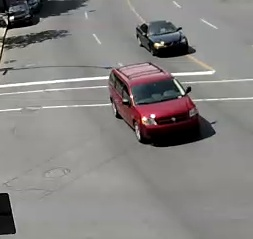

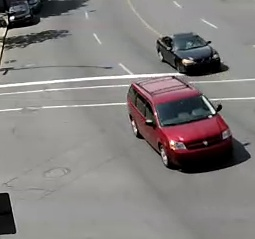

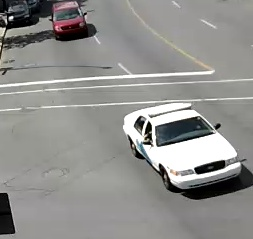

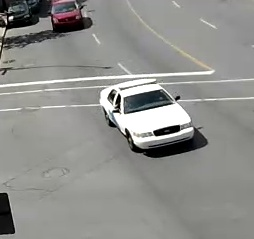

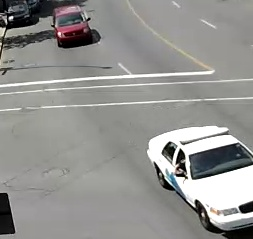

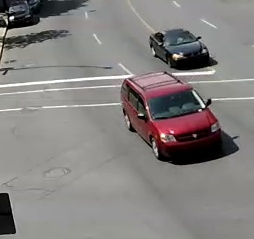

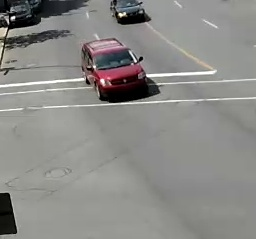

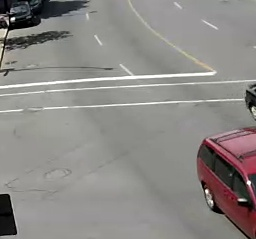

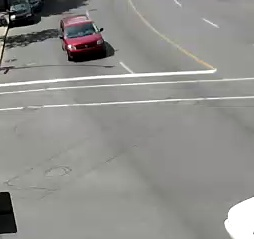

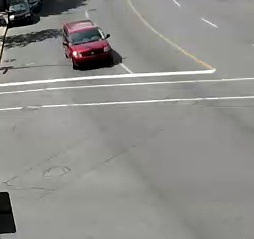

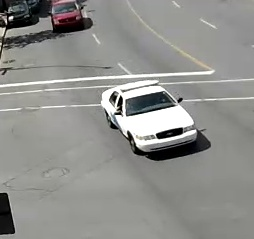

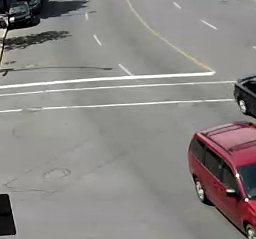

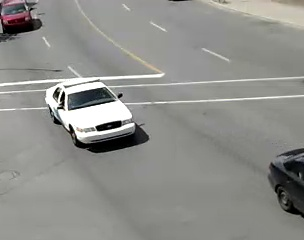

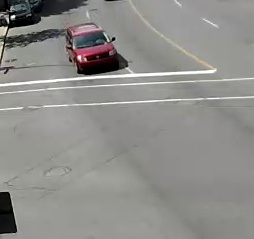

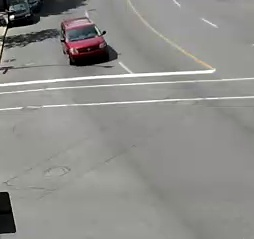

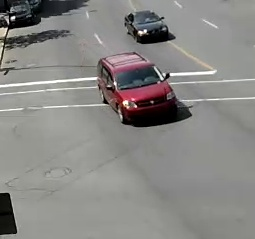

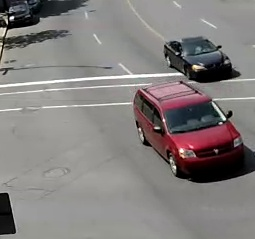

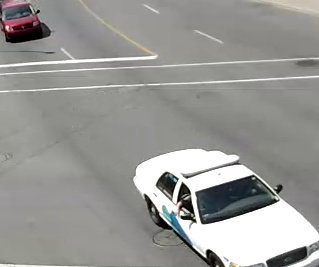

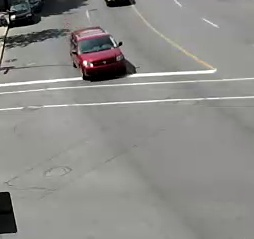

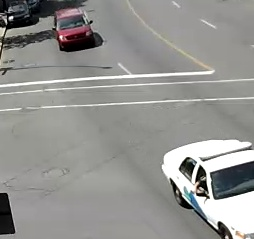

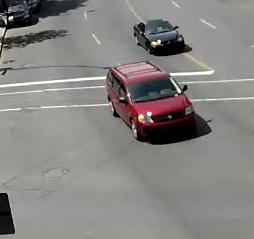

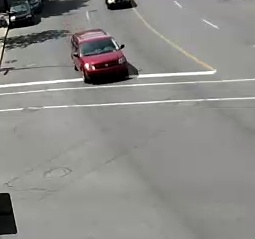

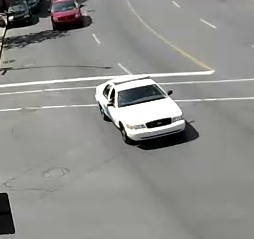

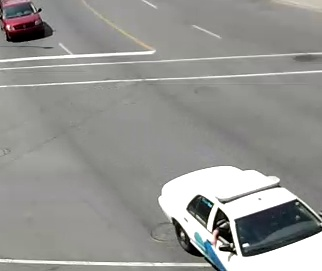

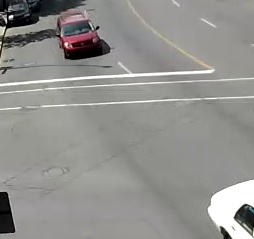

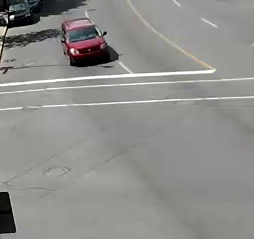

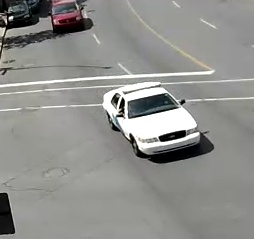

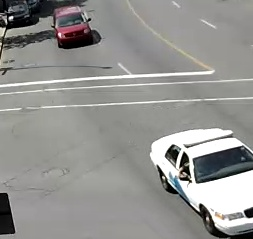

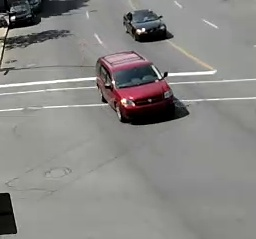

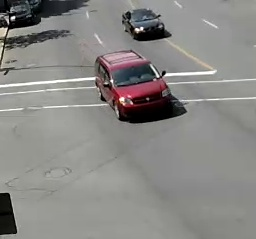

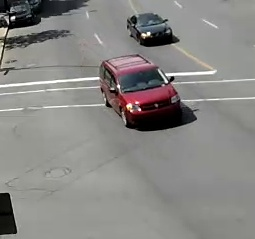

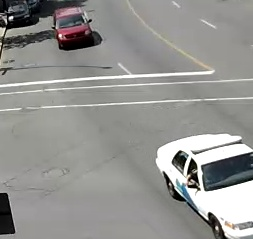

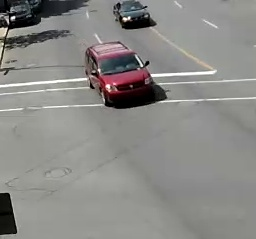

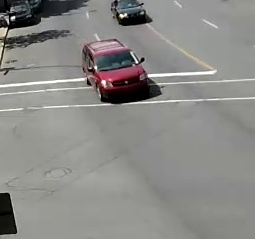

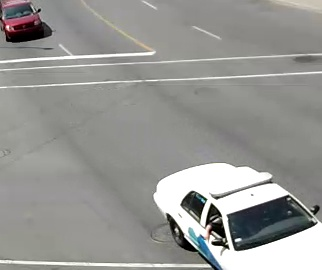

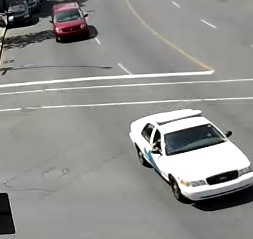

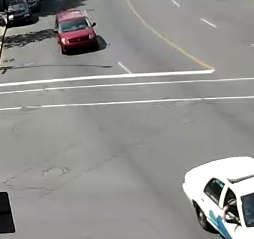

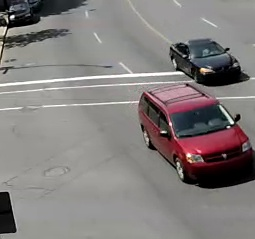

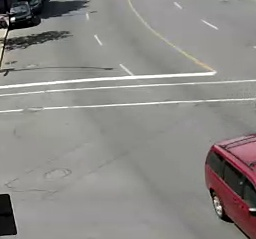

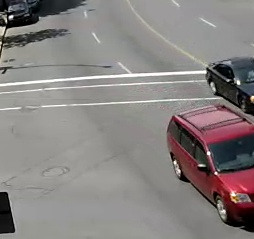

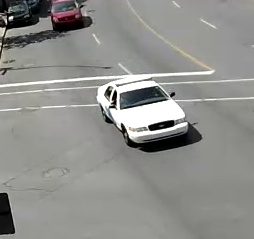

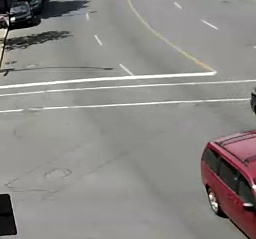

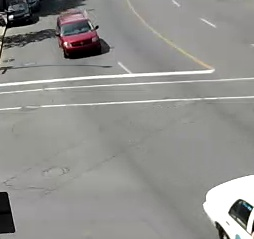

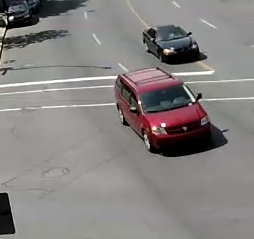

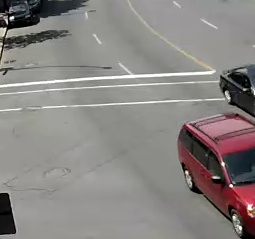

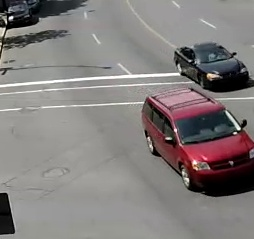

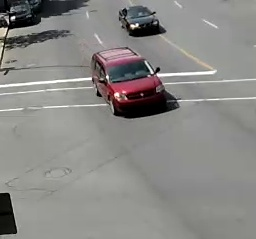

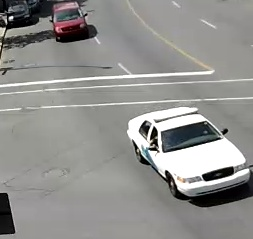

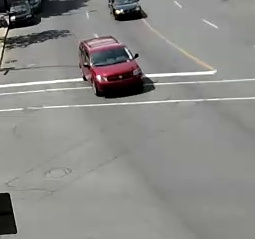

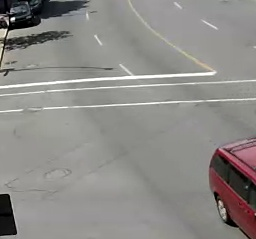

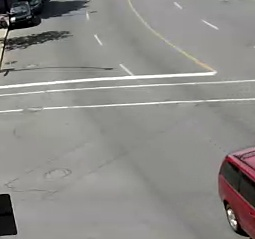

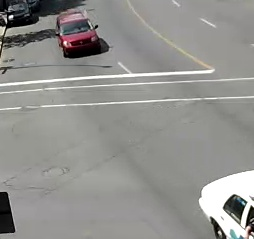

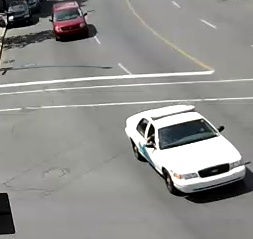

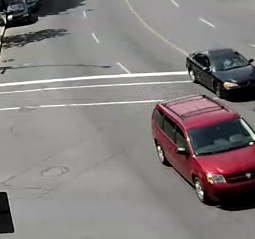

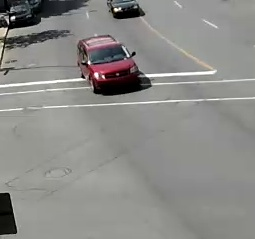

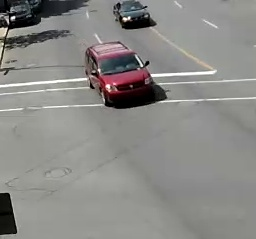

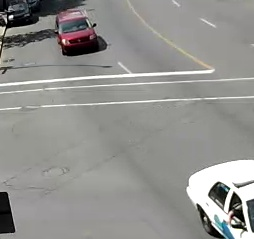

1


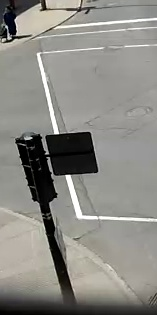

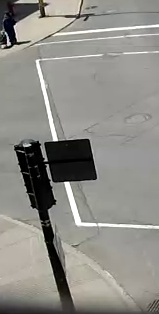

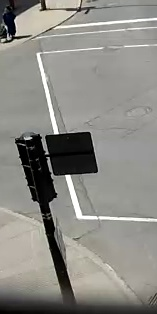

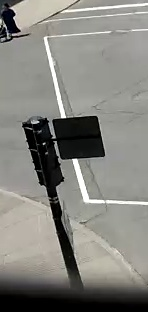

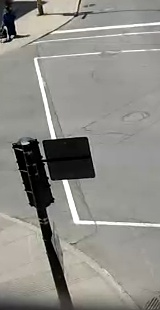

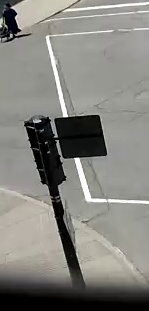

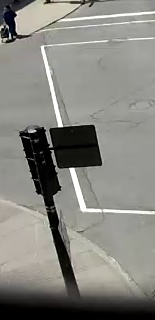

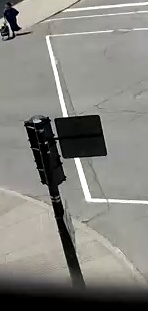

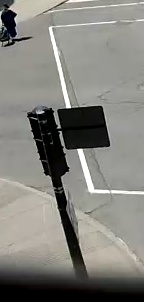

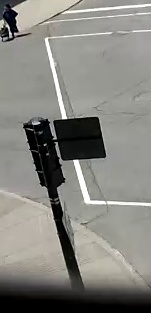

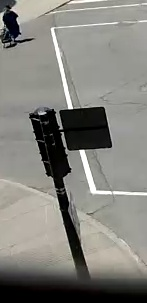

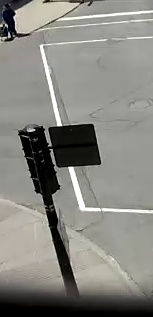

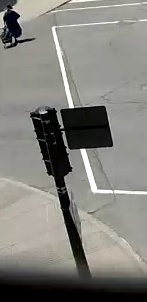

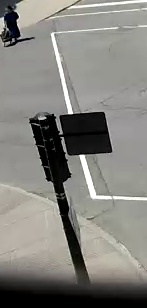

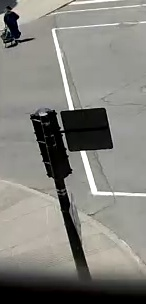

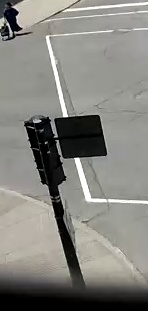

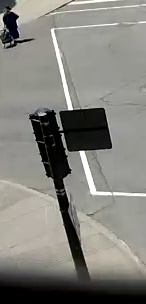

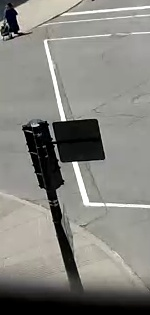

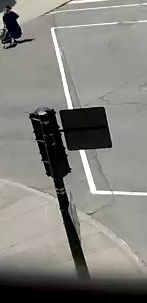

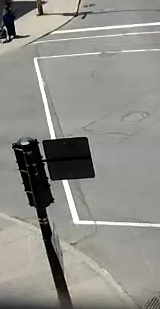

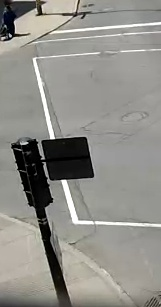

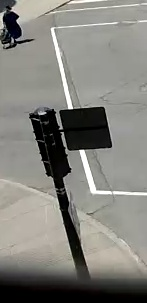

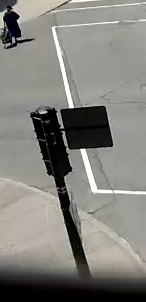

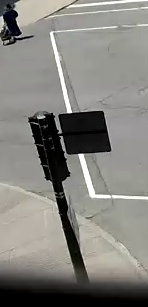

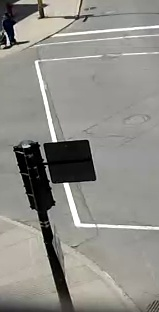

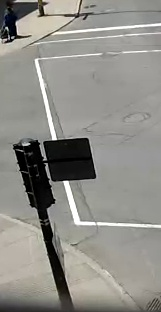

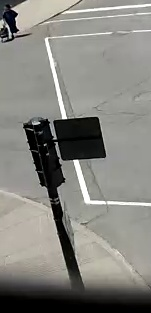

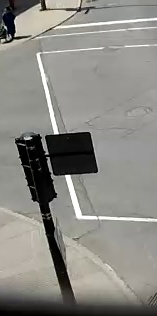

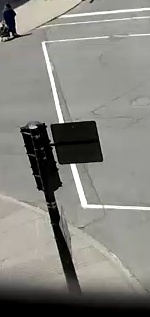

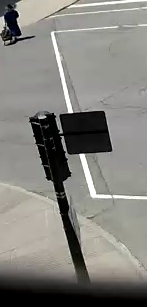

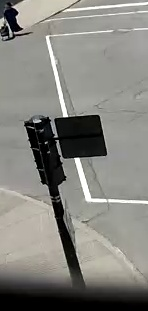

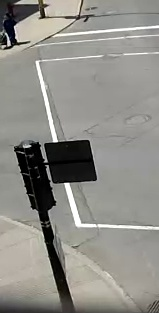

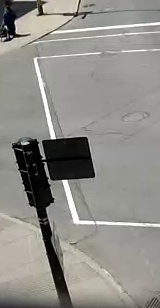

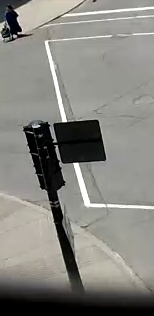

2


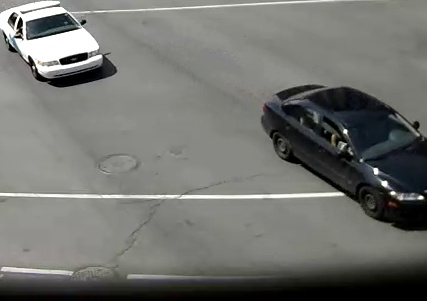

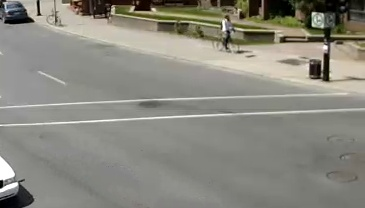

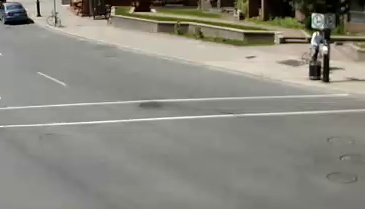

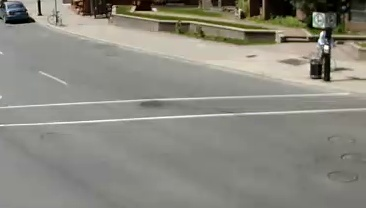

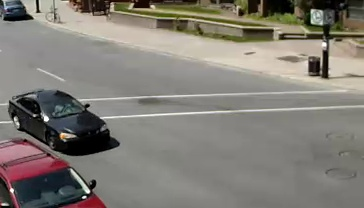

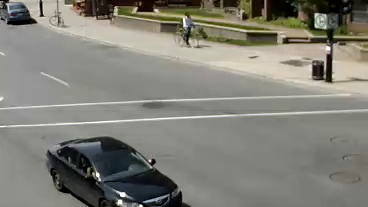

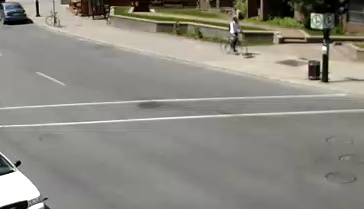

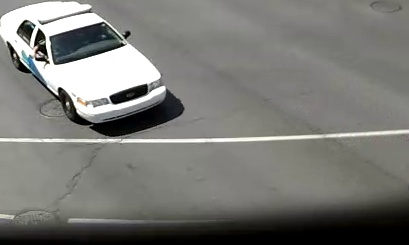

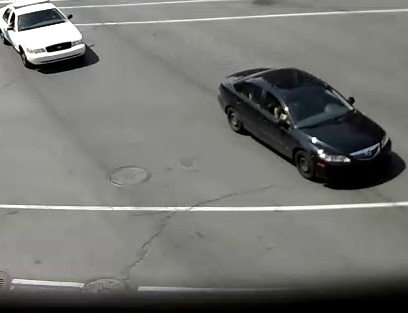

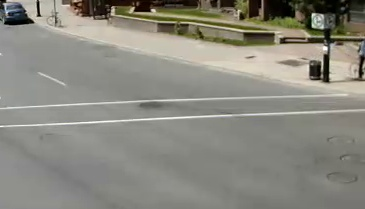

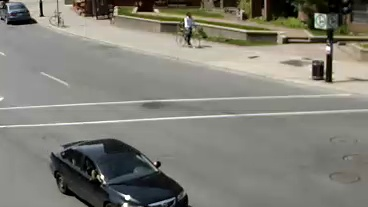

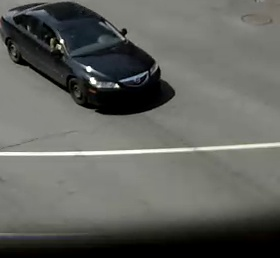

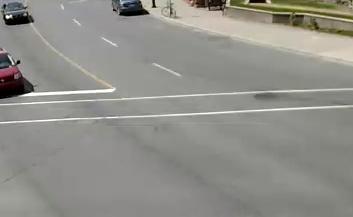

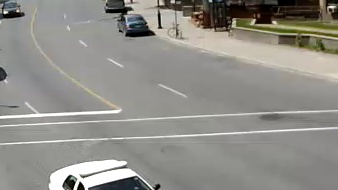

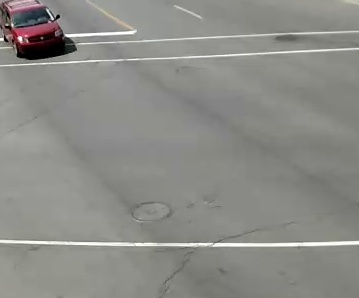

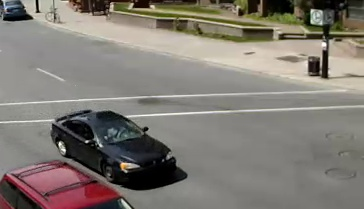

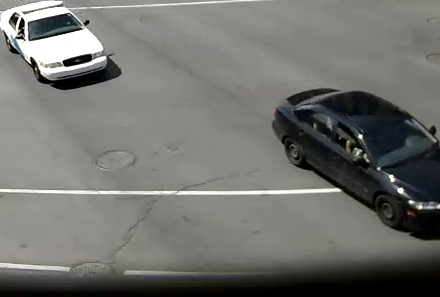

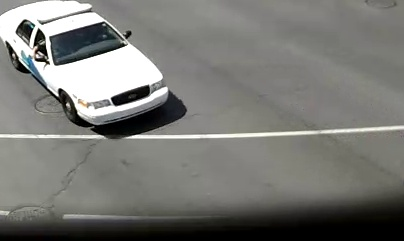

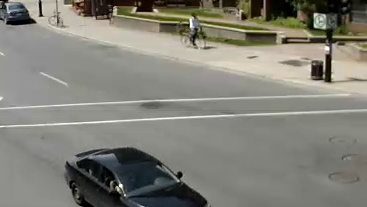

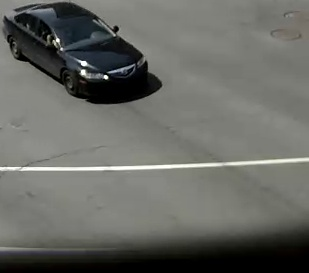

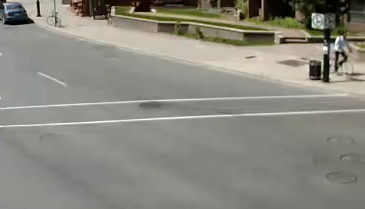

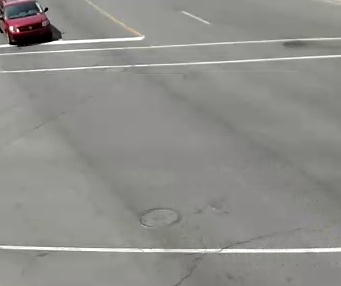

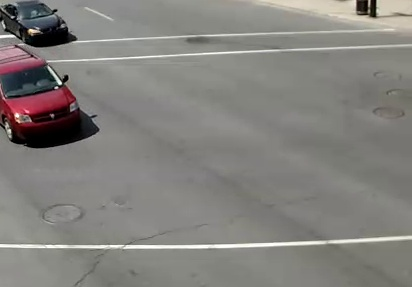

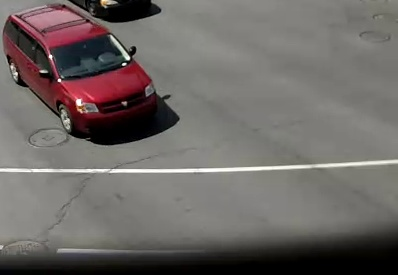

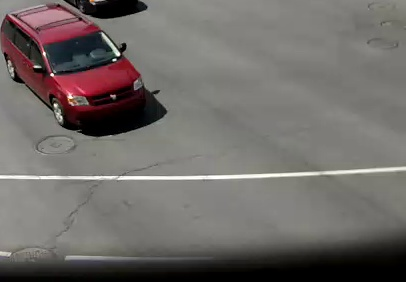

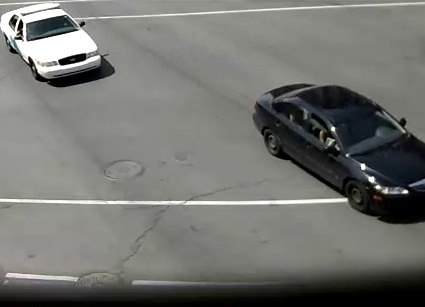

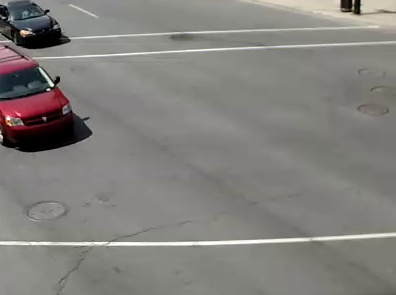

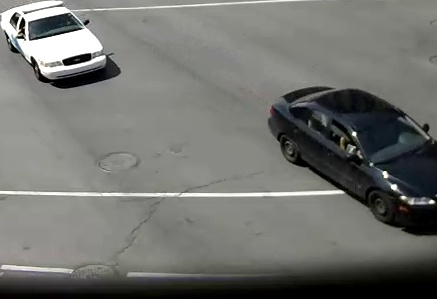

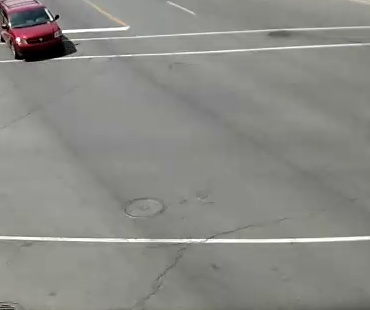

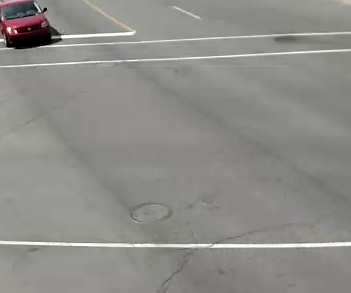

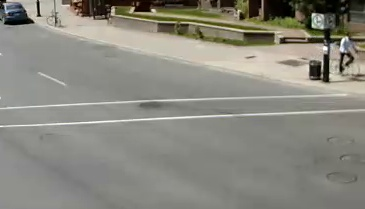

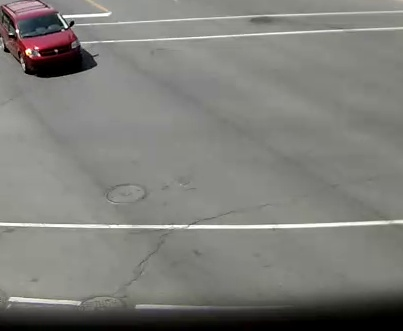

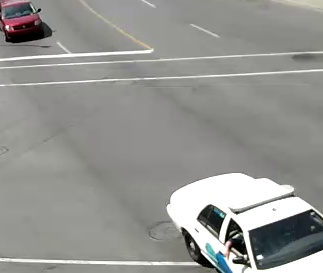

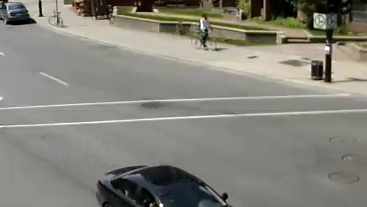

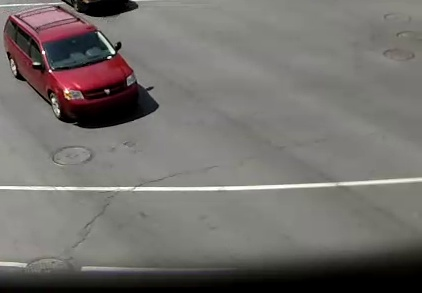

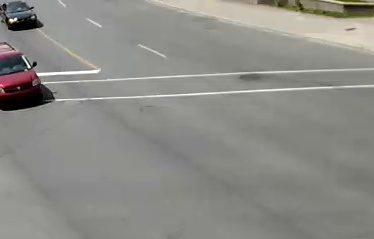

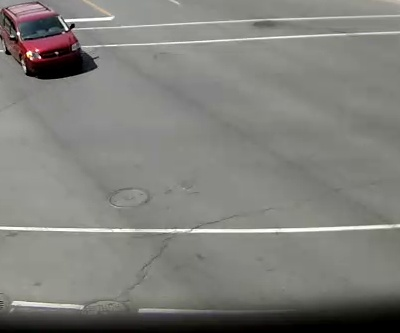

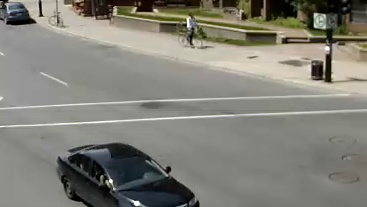

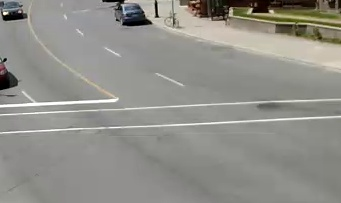

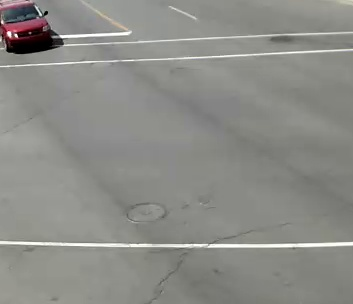

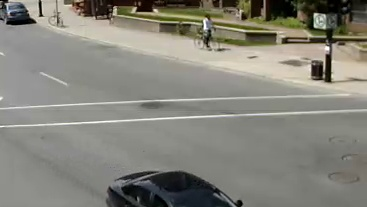

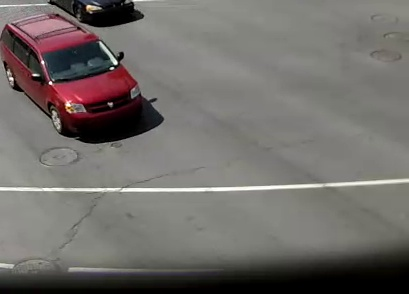

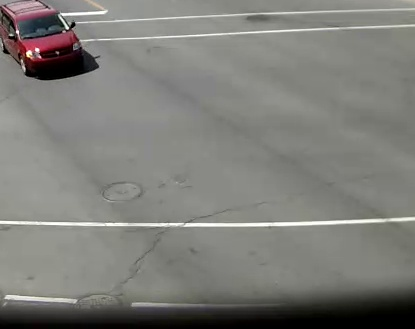

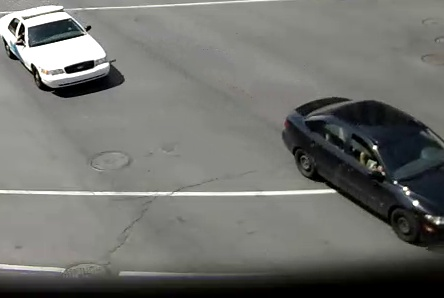

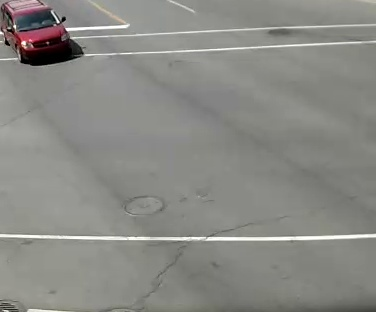

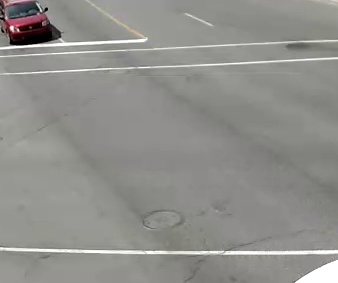

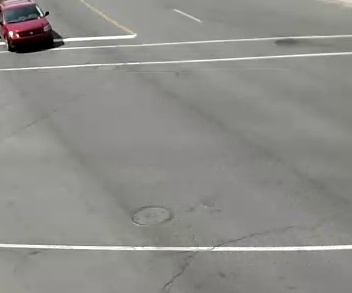

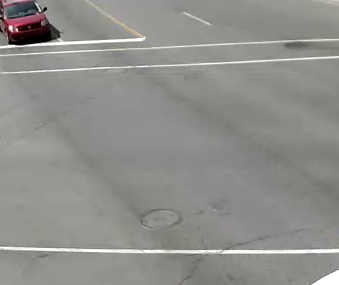

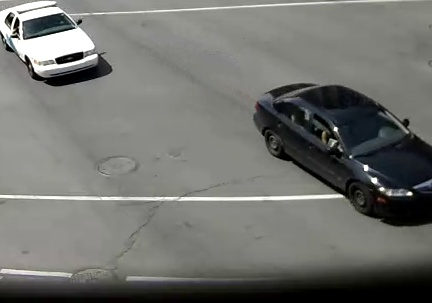

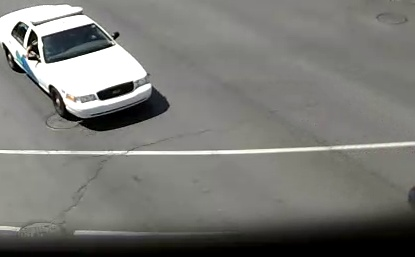

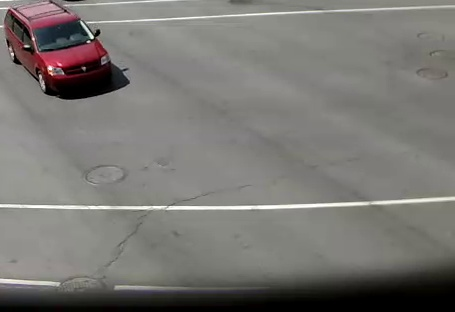

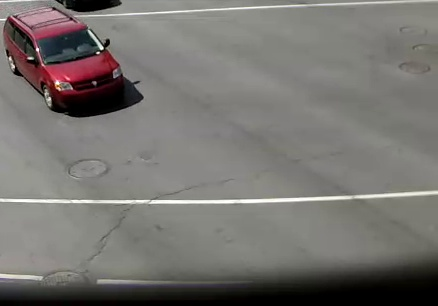

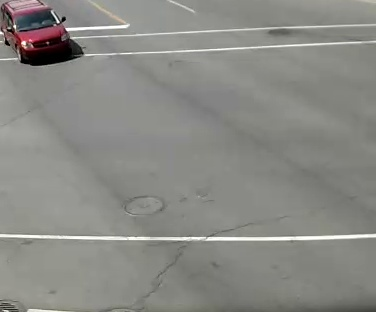

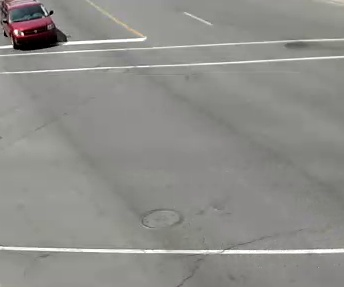

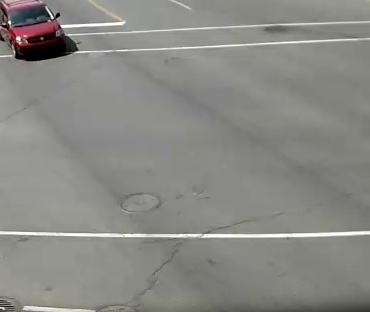

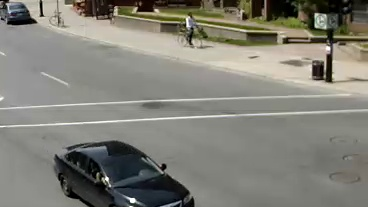

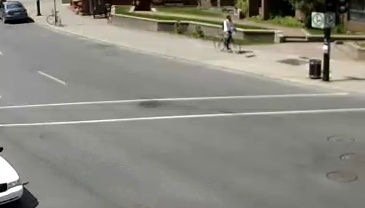

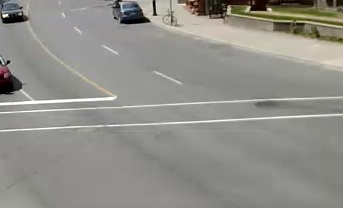

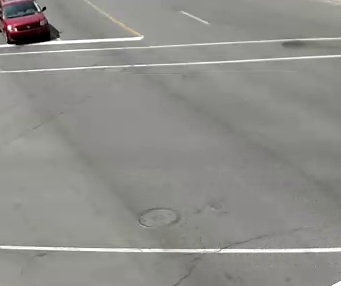

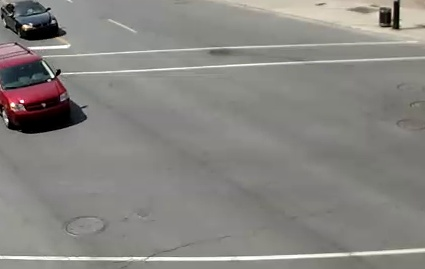

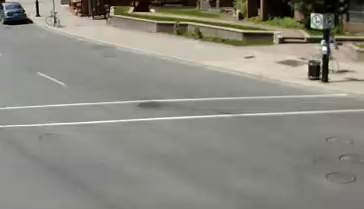

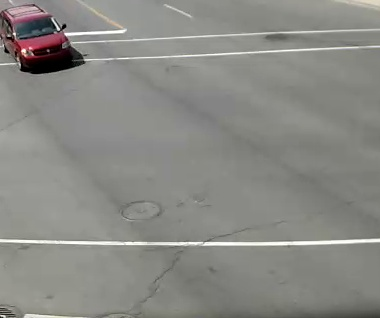

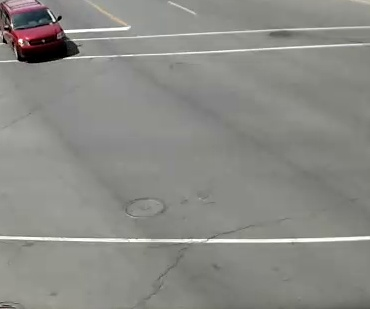

3
4


In [37]:
for cluster in clusters.keys():
    print(cluster)
    for img_ind in clusters[cluster]:
         display(Image(filename=img_path + '/' + onlyfiles[img_ind]))
        

In [38]:
# count = 0;
# for imageName in onlyfiles: #assuming JPG
#     display(Image(filename=img_path + '/' + imageName))
#     print(imageName)